In [1]:
%cd ..

/home/feodor/Jupyter/depth-poset


In [2]:
import numpy as np
import pandas as pd
import networkx as nx

import math

from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

from src.depth import DepthPoset
from src.complexes import CubicalTorusComplex, CubicalTorusComplexExtended
from src.complexes import EssentialCell

# CubicalTorusComplex

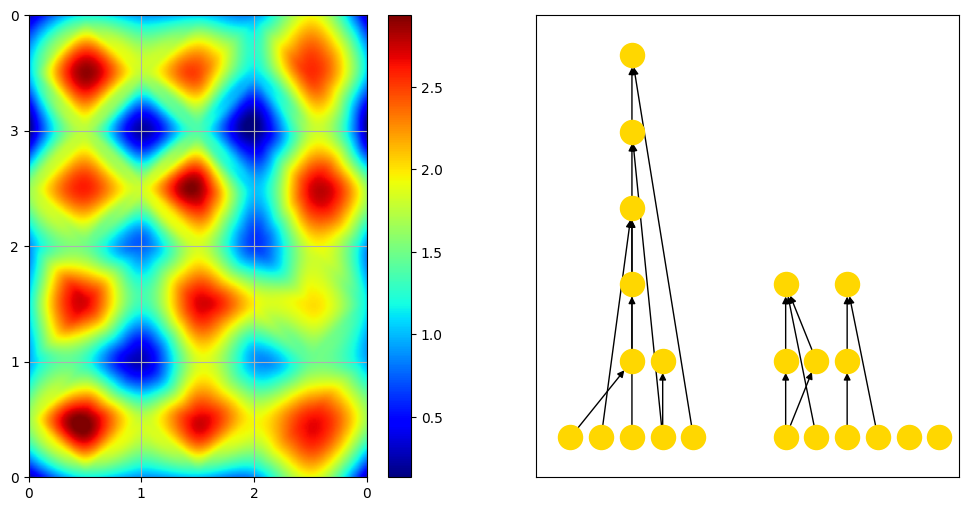

In [3]:
ctc = CubicalTorusComplex([3, 4]).assign_random_barycentric_filtration()

dp = ctc.get_depth_poset()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))


cm = ctc.draw_gradiental(ax=axs[0], cmap='jet')
plt.colorbar(cm, ax=axs[0])
axs[0].set_xticks(np.arange(ctc.shape[0] + 1), np.arange(ctc.shape[0] + 1)%ctc.shape[0])
axs[0].set_yticks(np.arange(ctc.shape[1] + 1), np.arange(ctc.shape[1] + 1)%ctc.shape[1])
axs[0].grid(True)

nx.draw_networkx(dp.get_transitive_reduction(), pos=dp.hasse_layout(), ax=axs[1], node_color='gold', with_labels=False)

# CubicalTorusComplexExtended

In [7]:
ctc = CubicalTorusComplexExtended([3, 3]).assign_random_barycentric_filtration()
ctc_origin = ctc.get_just_torus()

dp = ctc.get_depth_poset()
dp_origin = ctc_origin.get_depth_poset()

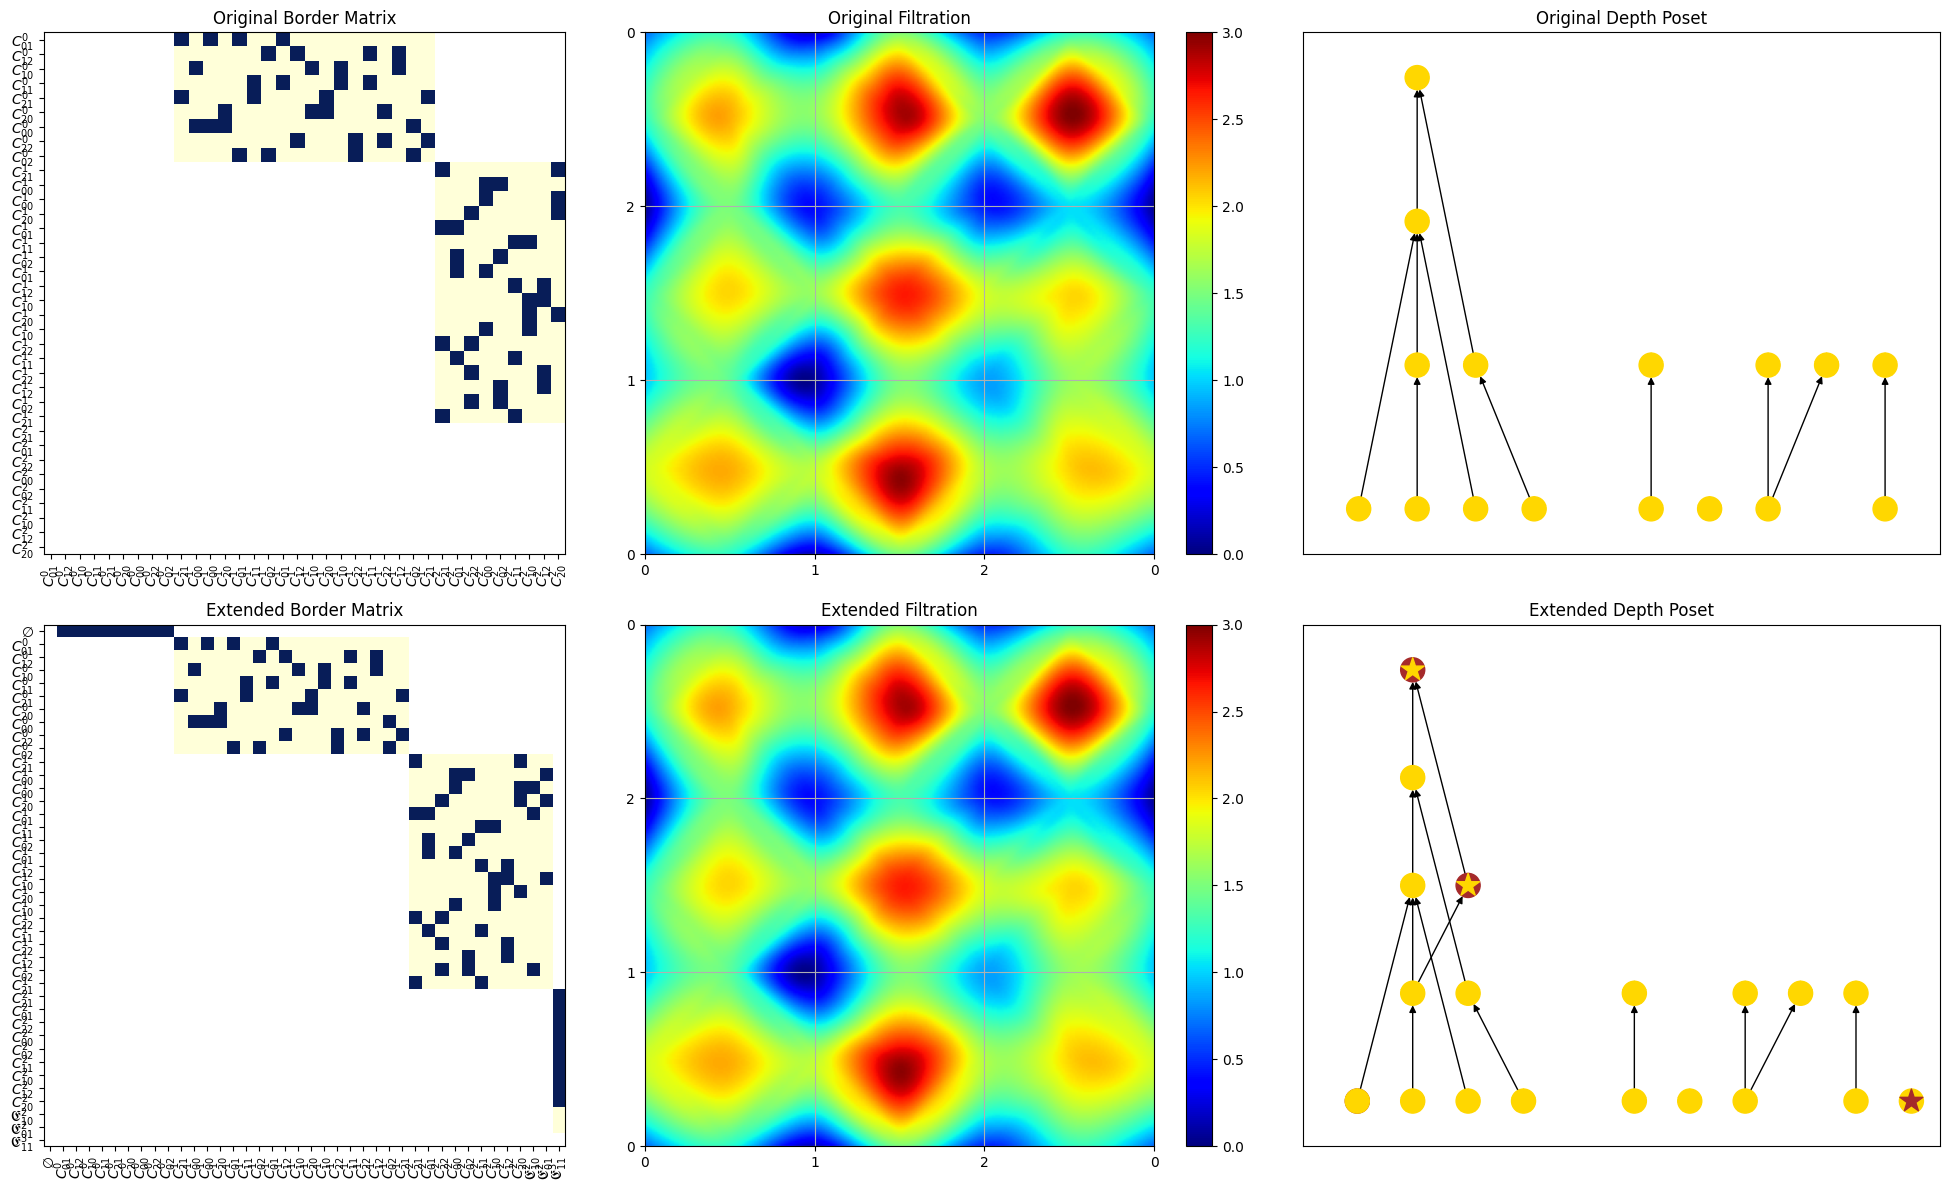

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))

for i, (label, dpi, ctci) in enumerate(zip(['Original', 'Extended'], [dp_origin, dp], [ctc_origin, ctc])):
    axs[i, 0].set_title(f'{label} Border Matrix')
    order, dims, values = ctci.get_order(return_dims=True, return_filtration=True)

    bm = ctci.get_border_matrix()
    bm_to_show = bm.copy().astype(float)
    bm_to_show[(dims.reshape(1, -1)  - dims.reshape(-1, 1) != 1) & (bm == 0)] = np.nan

    axs[i, 0].imshow(bm_to_show, cmap='YlGnBu')
    labels = [str(i) if isinstance(i, EssentialCell) else f'$C_{{{i[0][0]}{i[0][1]}}}^{int(np.log(len(i))/np.log(2))}$' for i in order]
    axs[i, 0].set_xticks(np.arange(len(labels)), labels=labels, rotation=90)
    axs[i, 0].set_yticks(np.arange(len(labels)), labels=labels, rotation=0)

    axs[i, 1].set_title(f'{label} Filtration')
    if ctci.dim == 2:
        cm = ctci.draw_gradiental(ax=axs[i, 1], cmap='jet', vmin=0, vmax=3)
        plt.colorbar(cm, ax=axs[i, 1])
        axs[i, 1].set_xticks(np.arange(ctc.shape[0] + 1), np.arange(ctc.shape[0] + 1)%ctc.shape[0])
        axs[i, 1].set_yticks(np.arange(ctc.shape[1] + 1), np.arange(ctc.shape[1] + 1)%ctc.shape[1])
        axs[i, 1].grid(True)
    else:
        axs[i, 1].set_xticks([])
        axs[i, 1].set_yticks([])


    axs[i, 2].set_title(f'{label} Depth Poset')
    birth_colors = ['brown' if isinstance(node.source[0], EssentialCell) else 'gold' for node in dpi.nodes]
    death_colors = ['brown' if isinstance(node.source[1], EssentialCell) else 'gold' for node in dpi.nodes]

    nx.draw_networkx(dpi.get_transitive_reduction(), pos=dpi.hasse_layout(), ax=axs[i, 2], node_color=death_colors, node_shape='o', with_labels=False)
    nx.draw_networkx_nodes(dpi.get_transitive_reduction(), pos=dpi.hasse_layout(), ax=axs[i, 2], node_color=birth_colors, node_shape='*')

plt.tight_layout()
plt.show()